<a href="https://colab.research.google.com/github/varahakrishna/Water-safety-analysis/blob/main/Water_safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Number of missing values
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np



import plotly.express as px
import matplotlib.pyplot as plt

data = pd.read_csv("water.csv")
print("The sample of data is: ", (data.shape))
data.head()

The sample of data is:  (3276, 10)


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
# Imputing Null Values with median

data['ph'] = data['ph'].fillna(np.nanmedian(data['ph']))
data['Sulfate'] = data['Sulfate'].fillna(np.nanmedian(data['Sulfate']))
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(np.nanmedian(data['Trihalomethanes']))

In [ ]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
X = data.iloc[:,:9]
y = data[['Potability']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Missing data have been successfully imputed
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
print("The sample of data is: ", (data.shape))
data.head()

The sample of data is:  (3276, 10)


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.036752  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
# No Duplicates
data.drop_duplicates()
print("The sample of data is: ", (data.shape))

The sample of data is:  (3276, 10)


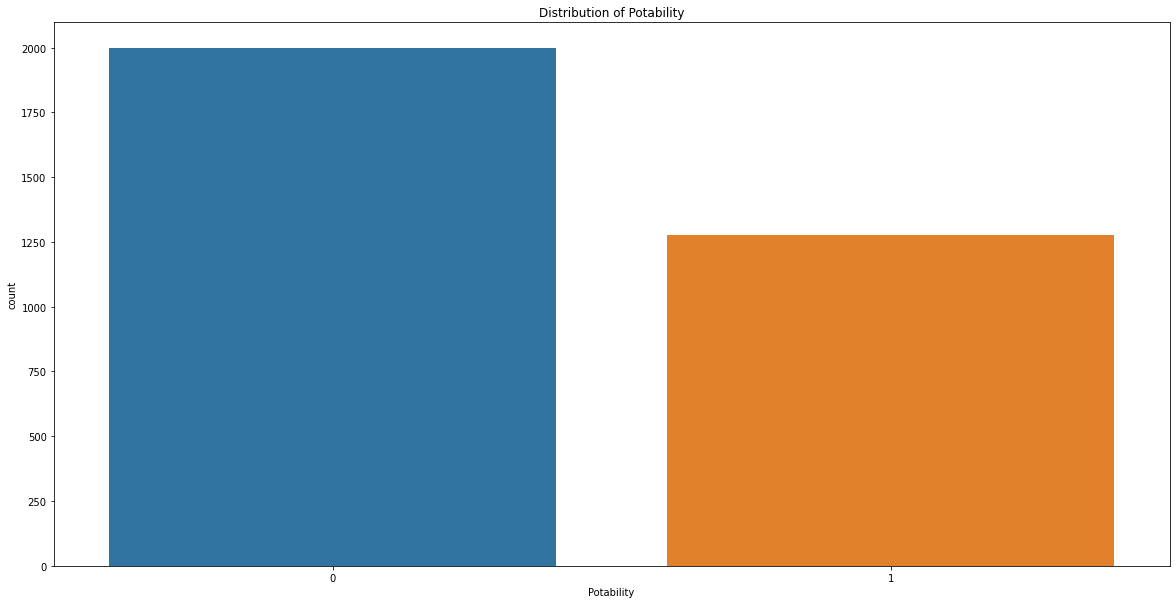

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=data.Potability)
plt.title("Distribution of Potability")
plt.show()

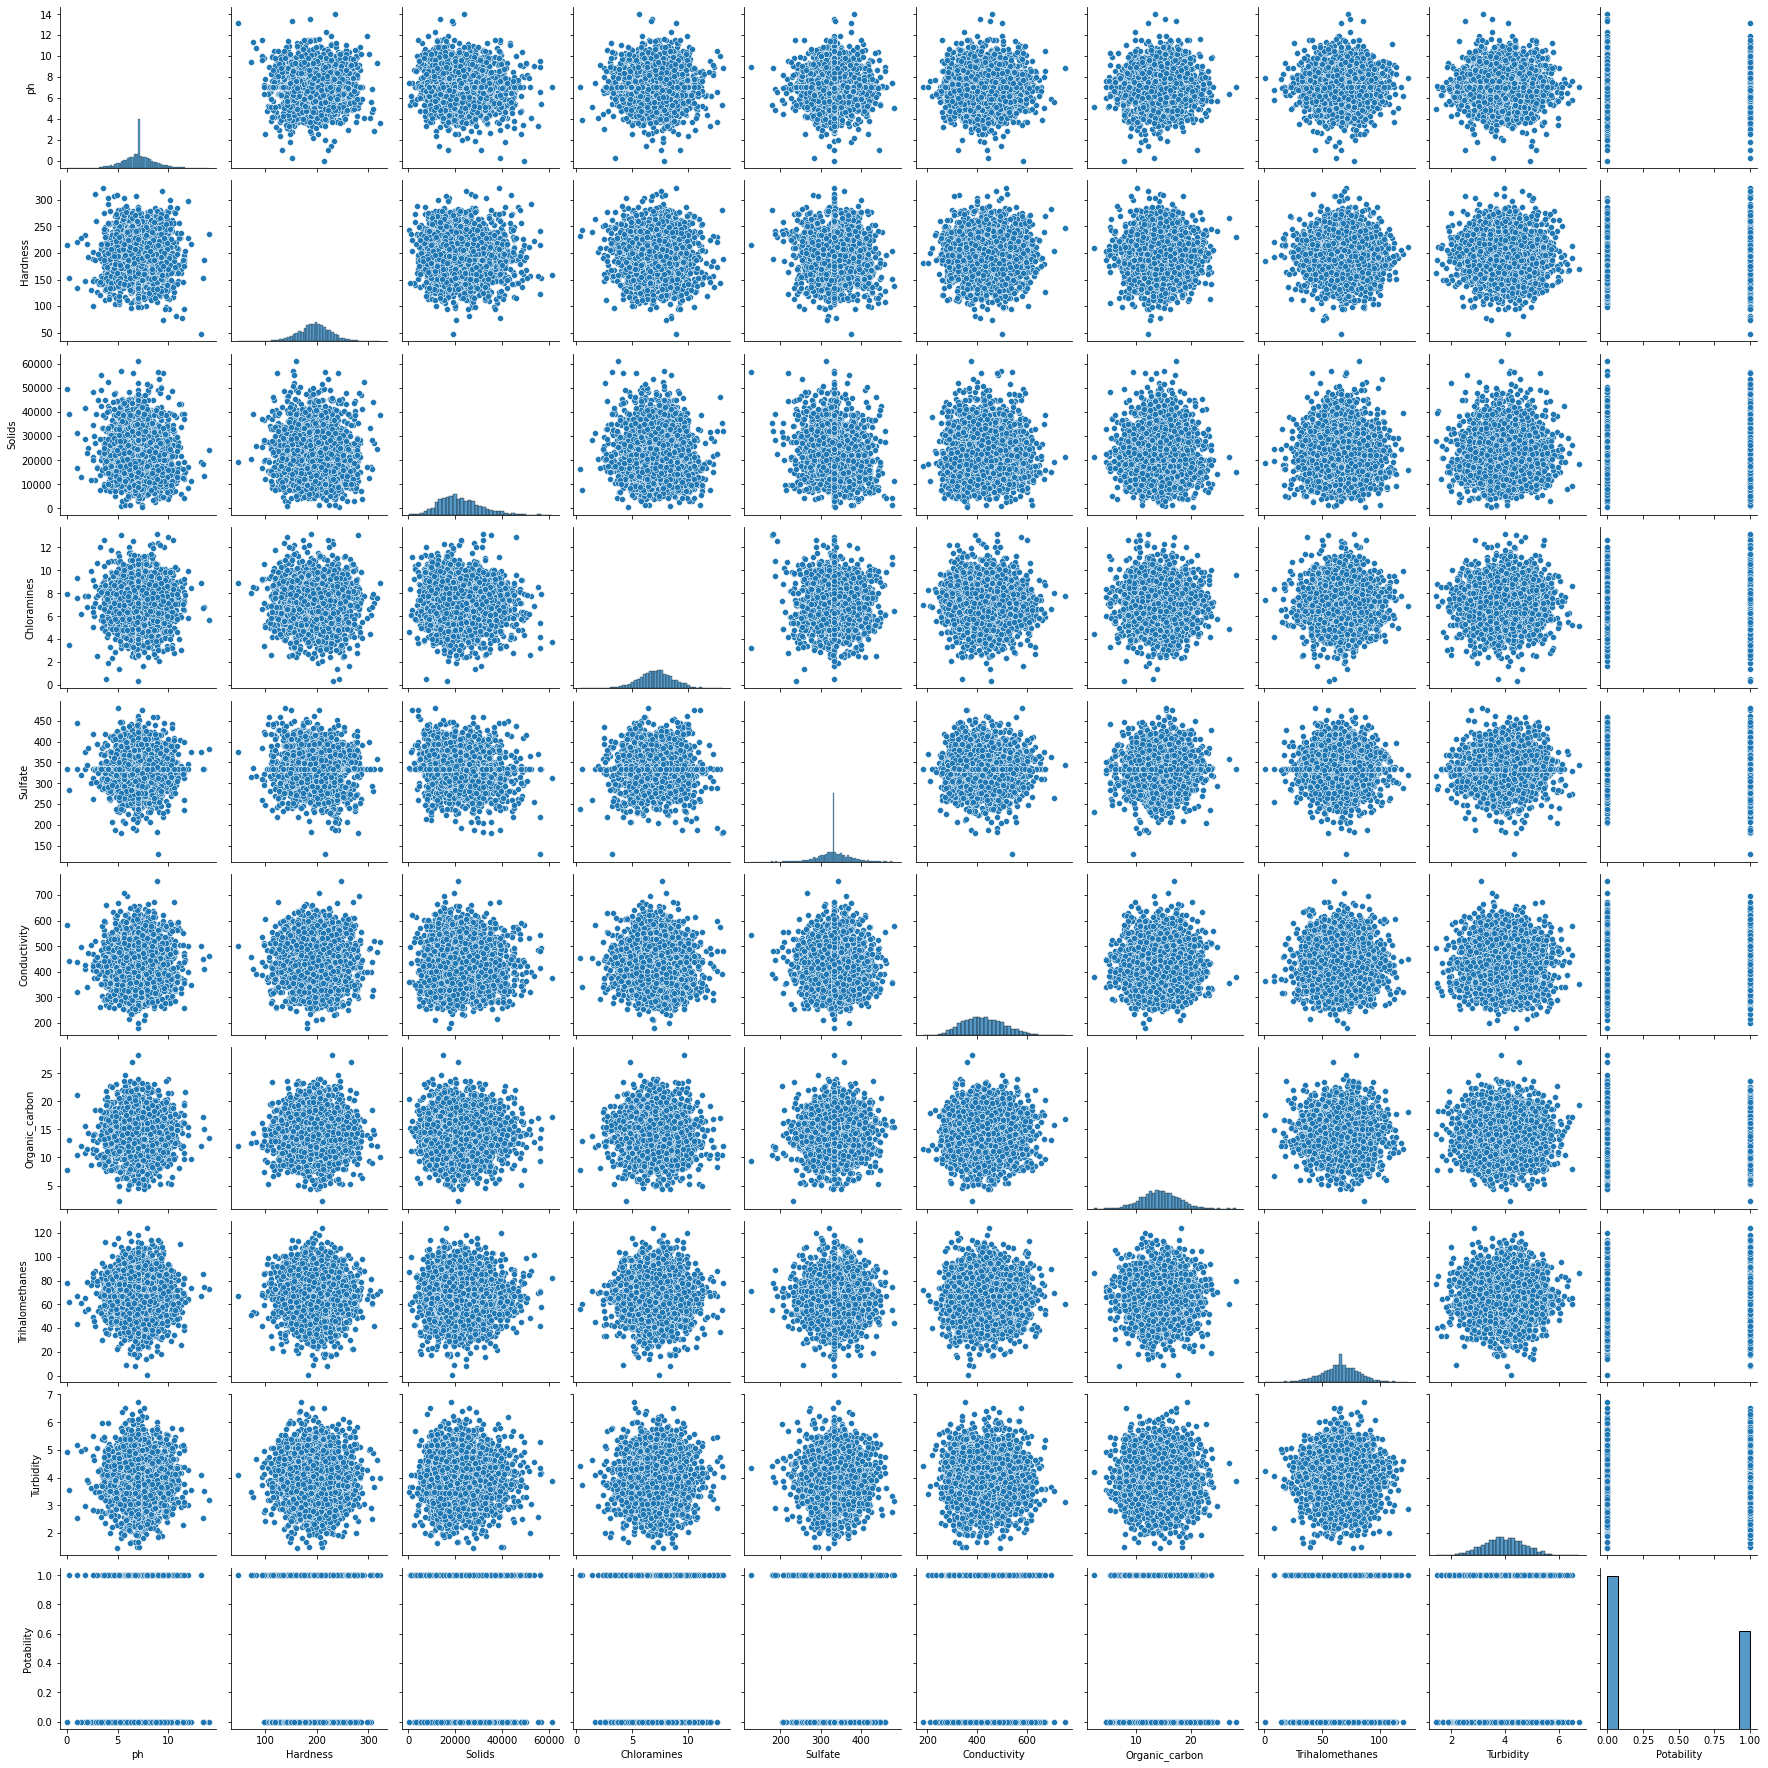

In [ ]:
sns.pairplot(data)

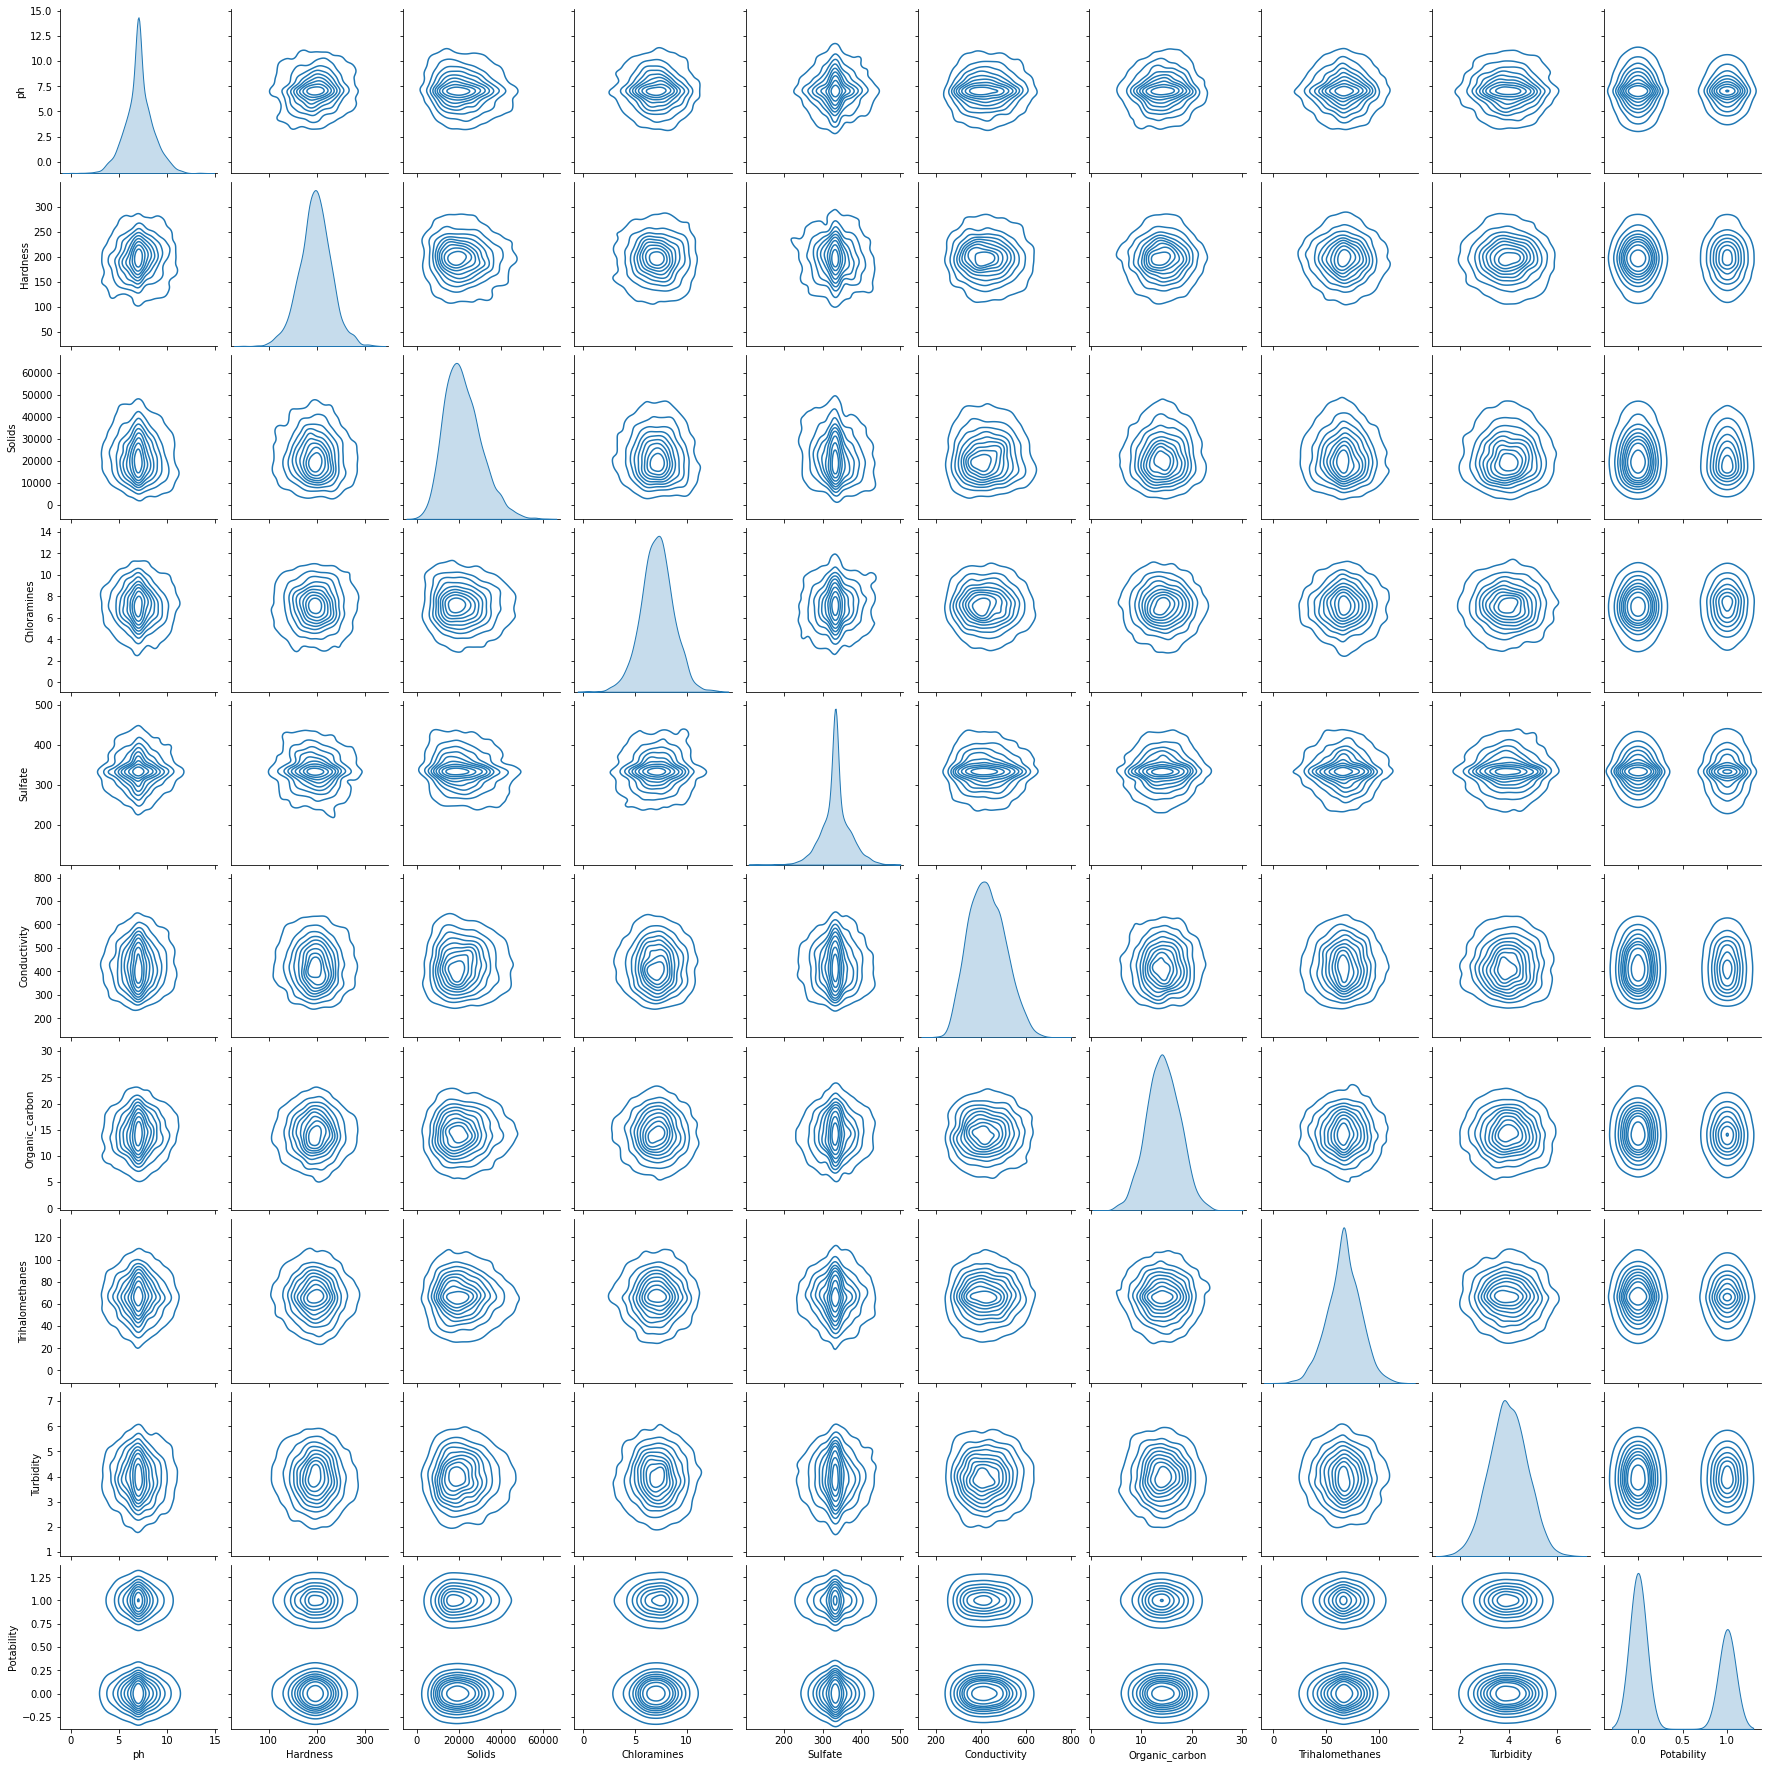

In [ ]:
sns.pairplot(data,kind = 'kde')

In [ ]:
# Histogram Function
def histogram(attr):
    plot = px.histogram(data, x = attr,color = "Potability", 
                      title= ("Factor {} Affecting Water Quality").format(attr))
    plot.show()

In [ ]:

histogram("ph")

In [ ]:
histogram("Hardness")

In [ ]:
histogram("Solids")

In [ ]:
histogram("Turbidity")

In [ ]:
histogram("Chloramines")

In [ ]:
histogram("Sulfate")

In [ ]:
histogram("Conductivity")

In [ ]:
histogram("Organic_carbon")

In [ ]:
histogram("Trihalomethanes")

In [ ]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
import numpy as np
import pandas as pd
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    
    dataframe = []
    ml_models = [
          ('Random Forest', RandomForestClassifier()),
          ('K-Nearest Neighbor', KNeighborsClassifier())
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['portable', 'non-portable']
    for ml_mod, model in ml_models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(ml_mod)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(ml_mod)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = ml_mod
        dataframe.append(this_df)
    final = pd.concat(dataframe, ignore_index=True)
    return final

In [ ]:
final = run_exps(X_train,y_train.values.ravel(),X_test,y_test.values.ravel())

Random Forest
              precision    recall  f1-score   support

    portable       0.69      0.87      0.77       680
non-portable       0.61      0.35      0.44       402

    accuracy                           0.68      1082
   macro avg       0.65      0.61      0.61      1082
weighted avg       0.66      0.68      0.65      1082

K-Nearest Neighbor
              precision    recall  f1-score   support

    portable       0.63      0.70      0.67       680
non-portable       0.38      0.31      0.35       402

    accuracy                           0.56      1082
   macro avg       0.51      0.51      0.51      1082
weighted avg       0.54      0.56      0.55      1082




  accuracy is:0.6746765249537893


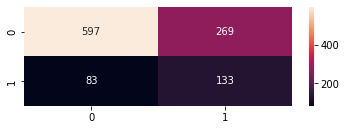

In [ ]:
model = RandomForestClassifier()
clf = model.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
tar_name = ['0', '1']

plt.subplot(2,1,1)
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')
print('\n  accuracy is:{}'.format(accuracy_score(y_pred, y_test)))

In [ ]:
cscore = [x[0] for x in y_pred_proba] 


  accuracy is:0.5582255083179297


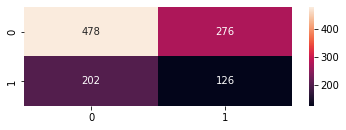

In [ ]:
model = KNeighborsClassifier()
clf = model.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
tar_name = ['0', '1']

plt.subplot(2,1,1)
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')
print('\n  accuracy is:{}'.format(accuracy_score(y_pred, y_test)))

In [ ]:

X_test['y_pred'] = y_pred
X_test['y_pred_proba'] = cscore

In [ ]:
X_test.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  \
2947   7.036752  183.521107  20461.252710     7.333212  333.119476   
2782   6.643159  188.913541  32873.820022     6.791509  333.848842   
1644   7.846058  224.058877  23264.109968     5.922367  300.402620   
70     7.160467  183.089310   6743.346066     3.803036  277.599099   
2045   6.615350  179.240661  26392.863612     9.309160  333.073546   
263   13.175402   47.432000  19237.949676     8.907020  375.147315   
1042   5.499489  230.308775  13902.968646     9.619575  352.084333   
2263  11.235426  178.596496  33773.107061     9.063042  327.650960   
450    7.036752  139.331152   2912.211247    10.338234  343.318021   
1832   7.036752  233.846621  32496.640216     6.637384  347.986448   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  y_pred  \
2947    356.369022       20.179029        67.019903   4.886634       0   
2782    336.561501       14.706810        67.844849   4.562198       0   
1644    387.971336       13.406737        43.075186   2.487969       0   
70      428.036344        9.799625        90.035374   3.884891       1   
2045    496.363562       12.786595        78.262369   4.453443       0   
263     500.245952       12.083896        66.622485   4.106924       0   
1042    442.167006       14.740787        66.622485   5.846827       0   
2263    425.868039       17.986255        58.986652   5.147055       1   
450     532.885196       11.078341        42.172824   4.093098       1   
1832    424.649773       13.028000        55.983973   4.296189       0   

      y_pred_proba  
2947          0.74  
2782          0.74  
1644          0.58  
70            0.52  
2045          0.68  
263           0.31  
1042          0.49  
2263          0.51  
450           0.35  
1832          0.69